In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, QuantileRegressor
import numpy as np
import lightgbm as lgb
import catboost as cb

In [71]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/ggogia/Downloads/nature-and-conflicts-main/02_dataset/merged_df.csv')

# Display the first 5 rows
print(df.head())



   Unnamed: 0 ISO3_code  Year      country  yearly_avg_rainfall  \
0           0       AFG  1960  Afghanistan           318.565807   
1           1       AFG  1961  Afghanistan           294.653108   
2           2       AFG  1962  Afghanistan           243.503638   
3           3       AFG  1963  Afghanistan           307.702050   
4           4       AFG  1964  Afghanistan           300.362434   

   rainfall_var_t  rainfall_var_t_1  yearly_avg_temp  temp_var_t  \
0       -0.075064         -0.075064       116.206019    0.036755   
1       -0.075064         -0.075064       120.477183    0.036755   
2       -0.173592         -0.075064       117.250992   -0.026778   
3        0.263645         -0.173592       126.046296    0.075013   
4       -0.023853          0.263645       110.172619   -0.125935   

   temp_var_t_1  pt_gdp_agriculture  oil_rent  democracy_polity  \
0      0.036755            38.62789  0.005149             -10.0   
1      0.036755            38.62789  0.005149         

In [74]:
troubled20  = ["Georgia", "Turkey", "Brazil", "Argentina", "France", "India", "Pakistan", "Egypt", "Syria", "South Korea", "Hong Kong", "South Africa"]
filtered_df = df[df["country"].isin(troubled20)]
df  = filtered_df

In [75]:
from sklearn.model_selection import train_test_split

# Drop the column `Unnamed: 0`
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows with missing values in the entire DataFrame
df.dropna(inplace=True)

# Define the target variables
target_variables = ['participants', 'protest_fraction']

# Use all other columns as features
X = df.drop(columns=target_variables)
X = X.drop(columns=['country', 'Year', 'ISO3_code'])

# Loop through each target variable and create a separate y
for target in target_variables:
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the resulting datasets
    print(f"Target Variable: {target}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

KeyError: "['Unnamed: 0'] not found in axis"

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the function to train and evaluate models
def train_and_evaluate_model(X_train, y_train, X_test, y_test, target_name):
    print(f"Target Variable: {target_name}")

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print("Linear Regression: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_lr, rmse_lr, mae_lr, r2_lr))

    # Random Forest Regressor with Hyperparameter Tuning
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    }
    grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
    grid_search_rf.fit(X_train, y_train)
    best_rf = grid_search_rf.best_estimator_
    y_pred_rf = best_rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print("Random Forest Regressor: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_rf, rmse_rf, mae_rf, r2_rf))
    print("Best Random Forest Params:", grid_search_rf.best_params_)

    # Gradient Boosting Regressor
    gb = GradientBoostingRegressor(random_state=42)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    rmse_gb = np.sqrt(mse_gb)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    print("Gradient Boosting Regressor: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_gb, rmse_gb, mae_gb, r2_gb))

    # Ridge Regression
    ridge = Ridge(alpha=1.0)  # You can tune alpha
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print("Ridge Regression: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_ridge, rmse_ridge, mae_ridge, r2_ridge))

    # Lasso Regression
    lasso = Lasso(alpha=1.0)  # You can tune alpha
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print("Lasso Regression: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_lasso, rmse_lasso, mae_lasso, r2_lasso))

    # Elastic Net Regression
    elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can tune alpha and l1_ratio
    elastic_net.fit(X_train, y_train)
    y_pred_elastic_net = elastic_net.predict(X_test)
    mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
    rmse_elastic_net = np.sqrt(mse_elastic_net)
    mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
    r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
    print("Elastic Net Regression: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_elastic_net, rmse_elastic_net, mae_elastic_net, r2_elastic_net))

    # Quantile Regression
    quantile_reg = QuantileRegressor(quantile=0.5)  # You can tune quantile
    quantile_reg.fit(X_train, y_train)
    y_pred_quantile = quantile_reg.predict(X_test)
    mse_quantile = mean_squared_error(y_test, y_pred_quantile)
    rmse_quantile = np.sqrt(mse_quantile)
    mae_quantile = mean_absolute_error(y_test, y_pred_quantile)
    r2_quantile = r2_score(y_test, y_pred_quantile)
    print("Quantile Regression: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_quantile, rmse_quantile, mae_quantile, r2_quantile))

    # LightGBM Regressor
    lgbm = lgb.LGBMRegressor(random_state=42)  # You can tune hyperparameters
    lgbm.fit(X_train, y_train)
    y_pred_lgbm = lgbm.predict(X_test)
    mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
    rmse_lgbm = np.sqrt(mse_lgbm)
    mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
    r2_lgbm = r2_score(y_test, y_pred_lgbm)
    print("LightGBM Regressor: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_lgbm, rmse_lgbm, mae_lgbm, r2_lgbm))

    # CatBoost Regressor
    catboost = cb.CatBoostRegressor(random_state=42, verbose=0)  # You can tune hyperparameters
    catboost.fit(X_train, y_train)
    y_pred_catboost = catboost.predict(X_test)
    mse_catboost = mean_squared_error(y_test, y_pred_catboost)
    rmse_catboost = np.sqrt(mse_catboost)
    mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
    r2_catboost = r2_score(y_test, y_pred_catboost)
    print("CatBoost Regressor: MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f}, R^2 = {:.2f}".format(mse_catboost, rmse_catboost, mae_catboost, r2_catboost))








# Loop through each target variable and train/evaluate models
target_variables = ['participants', 'protest_fraction']
for target in target_variables:
    y = df[target]
    X = df.drop(columns=target_variables)
    X = X.drop(columns=['country', 'Year', 'ISO3_code'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_and_evaluate_model(X_train, y_train, X_test, y_test, target)

Target Variable: participants
Linear Regression: MSE = 258864920741.50, RMSE = 508787.70, MAE = 272005.82, R^2 = 0.04
Random Forest Regressor: MSE = 297608750824.57, RMSE = 545535.29, MAE = 242996.22, R^2 = -0.11
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 100}
Gradient Boosting Regressor: MSE = 313984259451.98, RMSE = 560342.98, MAE = 267484.30, R^2 = -0.17
Ridge Regression: MSE = 248617100585.07, RMSE = 498615.18, MAE = 255190.56, R^2 = 0.08
Lasso Regression: MSE = 258845822469.62, RMSE = 508768.93, MAE = 271954.04, R^2 = 0.04
Elastic Net Regression: MSE = 265319472630.46, RMSE = 515091.71, MAE = 257919.79, R^2 = 0.01
Quantile Regression: MSE = 310893119016.49, RMSE = 557577.90, MAE = 226632.79, R^2 = -0.16
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 91, number 

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.00322e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.984e+12, tolerance: 1.265e+09
  model = cd_fast.enet_coordinate_descent(


CatBoost Regressor: MSE = 267585249308.25, RMSE = 517286.43, MAE = 236576.88, R^2 = 0.01
Target Variable: protest_fraction
Linear Regression: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.42
Random Forest Regressor: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.02
Best Random Forest Params: {'max_depth': 15, 'n_estimators': 200}
Gradient Boosting Regressor: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.16
Ridge Regression: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.25
Lasso Regression: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.08
Elastic Net Regression: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.08
Quantile Regression: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 91, number of used features: 19
[LightGBM] [Info] Start train

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.00322e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


CatBoost Regressor: MSE = 0.00, RMSE = 0.00, MAE = 0.00, R^2 = -0.10


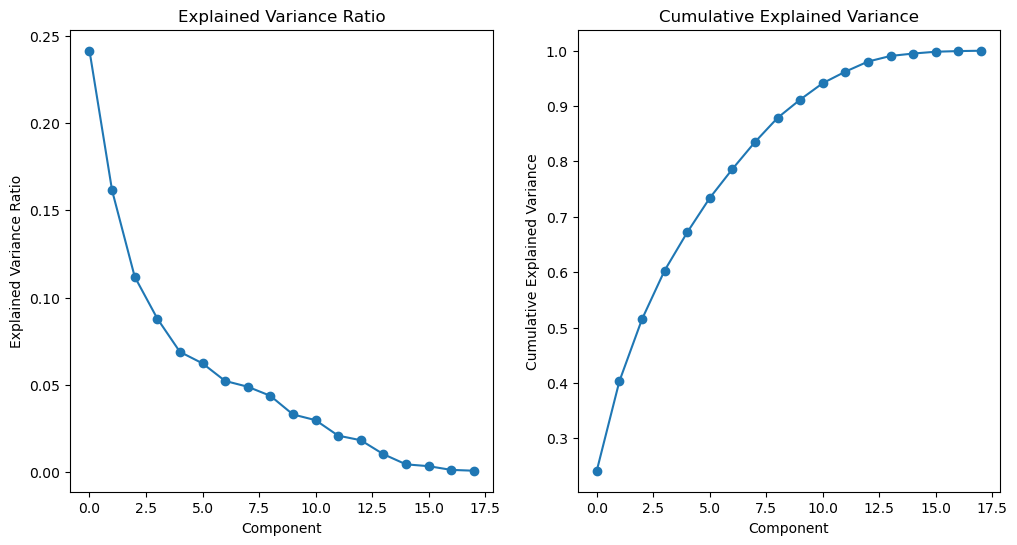

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SVD
n_components = min(X_scaled.shape) - 1  # Number of components can be at most the number of features - 1
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance
plt.figure(figsize=(12, 6))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio, 'o-')
plt.title('Explained Variance Ratio')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_explained_variance, 'o-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [79]:
# Apply SVD with 10 components
n_components = 10
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Convert the SVD output to a DataFrame
X_svd_df = pd.DataFrame(X_svd, columns=[f'component_{i}' for i in range(1, n_components + 1)])

# Display the first 5 rows of the dataframe
print(X_svd_df.head())

# Print the column names and their data types
print(X_svd_df.info())

   component_1  component_2  component_3  component_4  component_5  \
0     2.011596    -0.955867    -0.481124    -0.532218    -0.538090   
1     1.642441    -0.904225    -1.124406     0.656626     0.319060   
2     1.640762    -0.993202    -0.709941     0.025469    -0.065662   
3     1.698768    -0.579528     0.210640    -1.164280    -0.862278   
4     1.693556    -0.977884    -0.894915     0.116391     0.663995   

   component_6  component_7  component_8  component_9  component_10  
0    -0.154338    -1.384327     0.467704    -0.041644      0.364650  
1     0.452832    -1.126218     0.238809     0.770535      0.025571  
2     0.222639    -1.226123    -0.089921     0.354888     -0.015381  
3    -0.057592     3.087014    -0.538613    -1.257058      1.162804  
4     0.589028    -0.815323    -0.019306     0.722448     -0.249043  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------

In [80]:
# Loop through each target variable and train/evaluate models
target_variables = ['participants', 'protest_fraction']
for target in target_variables:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_svd_df, y, test_size=0.2, random_state=42)
    train_and_evaluate_model(X_train, y_train, X_test, y_test, target)

Target Variable: participants
Linear Regression: MSE = 262028976320.40, RMSE = 511887.66, MAE = 267804.15, R^2 = 0.03
Random Forest Regressor: MSE = 226089120434.81, RMSE = 475488.30, MAE = 242411.62, R^2 = 0.16
Best Random Forest Params: {'max_depth': 15, 'n_estimators': 300}
Gradient Boosting Regressor: MSE = 249566546038.60, RMSE = 499566.36, MAE = 285533.97, R^2 = 0.07
Ridge Regression: MSE = 262070456401.81, RMSE = 511928.18, MAE = 267515.99, R^2 = 0.03
Lasso Regression: MSE = 262028955808.55, RMSE = 511887.64, MAE = 267803.67, R^2 = 0.03
Elastic Net Regression: MSE = 264107906075.33, RMSE = 513914.30, MAE = 263185.89, R^2 = 0.02
Quantile Regression: MSE = 317294193343.48, RMSE = 563288.73, MAE = 225923.04, R^2 = -0.18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 91, number of